<a href="https://colab.research.google.com/github/laewonJeong/Data-Analysis-Programming/blob/main/DAP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraires**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Pokemon Data**

In [324]:
df = pd.read_csv('All_Pokemon.csv')
df.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


In [325]:
df.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1.032000e+03,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,4.432171,1.061362e+06,0.564922,93.879845,0.121124,0.048450,0.017442,0.019380,0.867490,1.147045,1.061289,1.045785,1.005814,1.210514,1.074612,0.956395,1.128391,1.171996,0.975533,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,2.263713,1.570876e+05,0.496008,76.316071,0.326430,0.214818,0.130974,0.137923,0.288087,0.703754,0.607551,0.635515,0.748643,0.759727,0.758243,0.544938,0.762139,0.593650,0.500431,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,1.000000,6.000000e+05,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,3.000000,1.000000e+06,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,5.000000,1.000000e+06,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,6.000000,1.250000e+06,1.000000,127.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,8.000000,1.640000e+06,1.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


# **Handling Missing Value**
Type 2열의 Null값이 있는 것을 확인

In [326]:
df.isnull().sum()

Number                       0
Name                         0
Type 1                       0
Type 2                     484
Abilities                    0
HP                           0
Att                          0
Def                          0
Spa                          0
Spd                          0
Spe                          0
BST                          0
Mean                         0
Standard Deviation           0
Generation                   0
Experience type              0
Experience to level 100      0
Final Evolution              0
Catch Rate                   0
Legendary                    0
Mega Evolution               0
Alolan Form                  0
Galarian Form                0
Against Normal               0
Against Fire                 0
Against Water                0
Against Electric             0
Against Grass                0
Against Ice                  0
Against Fighting             0
Against Poison               0
Against Ground               0
Against 

In [327]:
df = df.drop(['Type 2'], axis = 'columns')
df.isnull().sum()

Number                     0
Name                       0
Type 1                     0
Abilities                  0
HP                         0
Att                        0
Def                        0
Spa                        0
Spd                        0
Spe                        0
BST                        0
Mean                       0
Standard Deviation         0
Generation                 0
Experience type            0
Experience to level 100    0
Final Evolution            0
Catch Rate                 0
Legendary                  0
Mega Evolution             0
Alolan Form                0
Galarian Form              0
Against Normal             0
Against Fire               0
Against Water              0
Against Electric           0
Against Grass              0
Against Ice                0
Against Fighting           0
Against Poison             0
Against Ground             0
Against Flying             0
Against Psychic            0
Against Bug                0
Against Rock  

# **Visulization**

Check Type

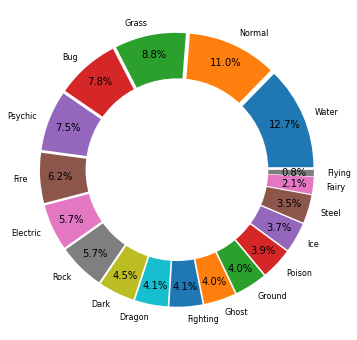

In [328]:
df_type = df['Type 1'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

ax.pie(df_type.values, labels = df_type.index, autopct='%1.1f%%', pctdistance=0.85, explode = explode )

#draw white circle in the middle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

Check Generation

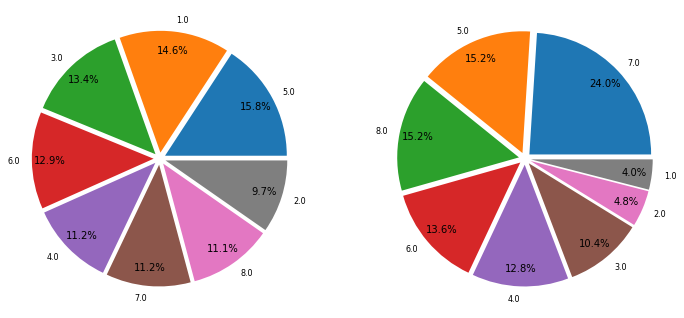

In [329]:
# 몇세대 포켓몬이 제일 많은지 파이차트를 이용해 확인
df_generation = df['Generation'].value_counts()
fig, ax = plt.subplots(1,2,figsize=(12,6))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)

ax[0].pie(df_generation.values, labels = df_generation.index, autopct='%1.1f%%', pctdistance=0.85, explode = explode )

# 전설의 포켓몬은 몇세대가 많은지 파이차트를 이용해 확인
df_legendary = df[df['Legendary']==1]
df_Lgeneration = df_legendary['Generation'].value_counts()

ax[1].pie(df_Lgeneration.values, labels = df_Lgeneration.index, autopct='%1.1f%%', pctdistance=0.85, explode = explode )

plt.show()

Check Legendary

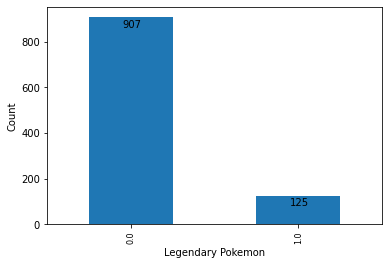

In [330]:
df_legendary = df['Legendary'].value_counts()
df_legendary.plot.bar(xlabel="Legendary Pokemon", ylabel = "Count")
plt.text(0.95,80,df_legendary[1])
plt.text(-0.05,860,df_legendary[0])
plt.show()

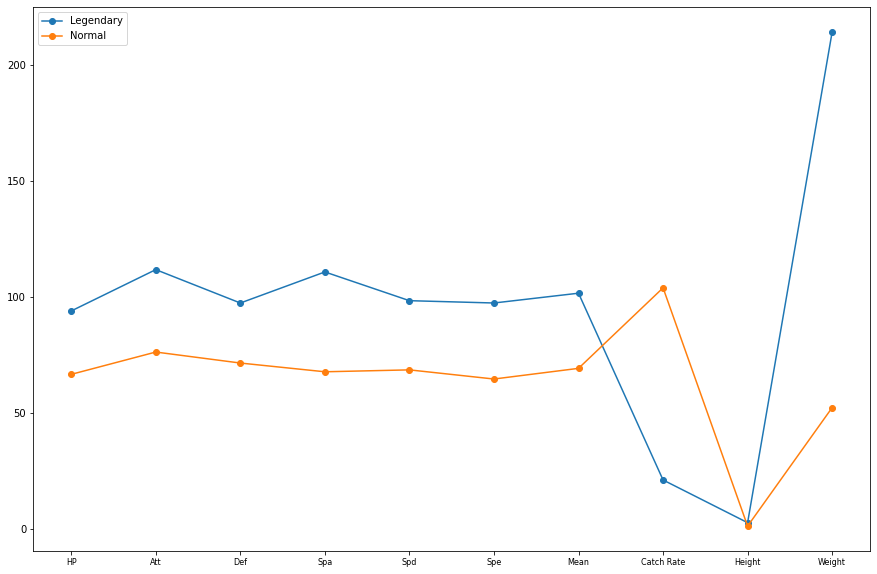

In [363]:
df_legendary = pd.DataFrame(df[df['Legendary']!=0])
df_normal = pd.DataFrame(df[df['Legendary']==0])

#전설의 포켓몬의 모든 값의 평균 구하기
a = df_legendary.describe()
a = pd.DataFrame(a)
a = a.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max'])# 평균값 빼고 다 제거
a= a.drop(['Number','BST',
       'Standard Deviation', 'Generation', 'Experience to level 100',
       'Final Evolution', 'Legendary', 'Mega Evolution',
       'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire',
       'Against Water', 'Against Electric', 'Against Grass', 'Against Ice',
       'Against Fighting', 'Against Poison', 'Against Ground',
       'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock',
       'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel',
       'Against Fairy','BMI'],axis='columns')# 쓸데 없는 columns 삭제
a = a.T

#그냥 노말 포켓몬의 모든 값의 평균 구하기
b = df_normal.describe()
b = pd.DataFrame(b)
b = b.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']) # 평균값 빼고 다 제거
b= b.drop(['Number','BST', 
       'Standard Deviation', 'Generation', 'Experience to level 100',
       'Final Evolution', 'Legendary', 'Mega Evolution',
       'Alolan Form', 'Galarian Form', 'Against Normal', 'Against Fire',
       'Against Water', 'Against Electric', 'Against Grass', 'Against Ice',
       'Against Fighting', 'Against Poison', 'Against Ground',
       'Against Flying', 'Against Psychic', 'Against Bug', 'Against Rock',
       'Against Ghost', 'Against Dragon', 'Against Dark', 'Against Steel',
       'Against Fairy','BMI'],axis='columns') # 쓸데 없는 columns 삭제
b = b.T

#선 그래프로 보이기
plt.figure(figsize = (15,10))
plt.plot(a,marker='o')
plt.plot(b,marker='o')
plt.legend(['Legendary','Normal'])

Mean값을 큰 순으로 정렬하고 상위 15마리 포켓몬이 전설의 포켓몬인지 확인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


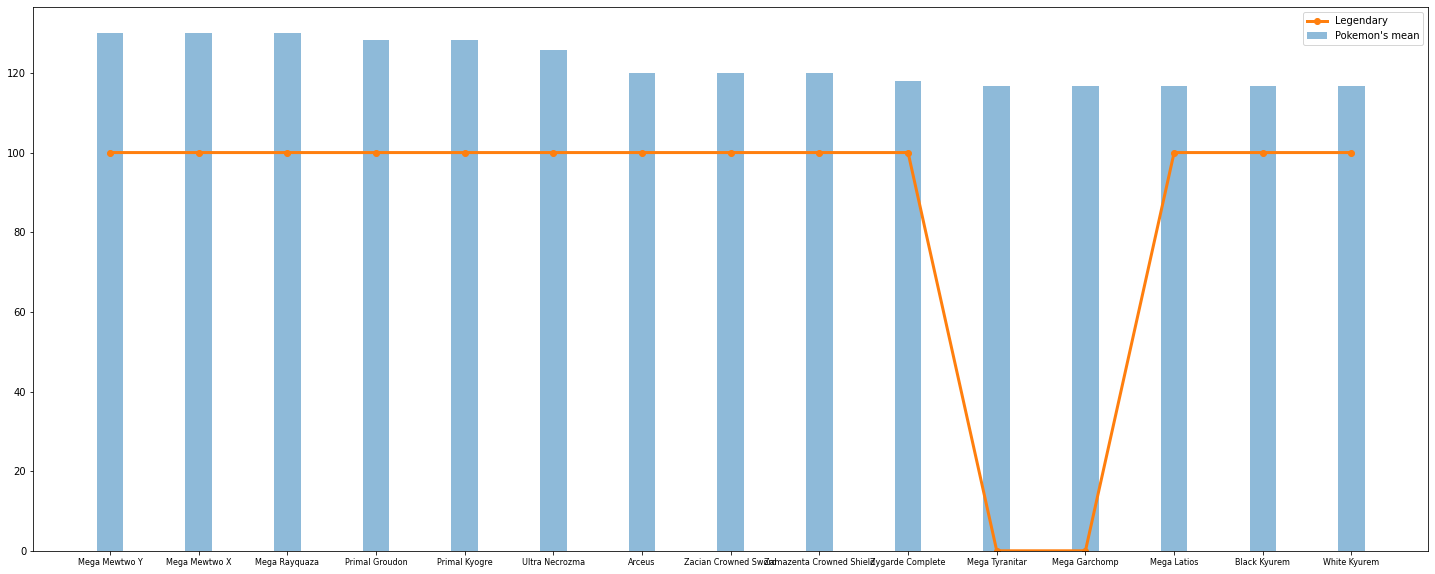

In [340]:
df_Mean = df.sort_values(by=['Mean'],axis = 0,ascending=False) #전체 능력치의 평균이 높은 순으로 정렬
# 평균 값과 이름과 Legendary 빼고 다 제거
df_Mean = df_Mean.drop(['Number', 'Type 1', 'Abilities', 'HP', 'Att', 'Def', 'Spa',
       'Spd', 'Spe', 'BST', 'Standard Deviation', 'Generation',
       'Experience type', 'Experience to level 100', 'Final Evolution',
       'Catch Rate', 'Mega Evolution', 'Alolan Form',
       'Galarian Form', 'Against Normal', 'Against Fire', 'Against Water',
       'Against Electric', 'Against Grass', 'Against Ice', 'Against Fighting',
       'Against Poison', 'Against Ground', 'Against Flying', 'Against Psychic',
       'Against Bug', 'Against Rock', 'Against Ghost', 'Against Dragon',
       'Against Dark', 'Against Steel', 'Against Fairy', 'Height', 'Weight',
       'BMI'], axis ='columns')

df_Mean = df_Mean.reset_index(drop=True) #인덱스 넘버 값을 리셋

df_Mean = df_Mean.drop(labels = range(15,1032), axis = 0) # 0 ~ 14까지의 행만 남겨두고 삭제


for i in range(len(df_Mean['Legendary'])):
  df_Mean['Legendary'][i] = df_Mean['Legendary'][i]*100 #전설의 포켓몬인지 확인하기 위해 모든 Legendary 값의 100을 곱함

plt.figure(figsize=(25,10)) # Figure 생성 사이즈는 10 by 10
xtick_label_position = list(range(len(df_Mean['Name']))) # x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, df_Mean['Name']) # x축 눈금 라벨 출력
 
# 바 차트 출력, 막대기 색깔을 파란색으로 설정, 선 그래프는 주황색으로 설정
plt.bar(xtick_label_position, df_Mean['Mean'], width=0.3,alpha = 0.5)
df_Mean['Legendary'].plot(color='#ff7f0e',linestyle = 'solid',linewidth = 3.0,marker='o')
plt.legend(['Legendary','Pokemon\'s mean'])
plt.show()

# **Train Test Split**

In [343]:
df = df.set_index("Name")
df = df.select_dtypes("number")
X = df.drop(["Legendary"],axis = 1)
y = df["Legendary"]

In [344]:
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

# **Import**

In [345]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# **Logistic Regression**

In [346]:
from sklearn.linear_model import LogisticRegression

LogisticReg = LogisticRegression(random_state = 42)

LogisticReg.fit(X_train, y_train)

predictions = LogisticReg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9033816425120773
Precision: 1.0
Recall: 0.23076923076923078
F1-Score: 0.375 

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       181
         1.0       1.00      0.23      0.38        26

    accuracy                           0.90       207
   macro avg       0.95      0.62      0.66       207
weighted avg       0.91      0.90      0.88       207



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **Naive Bayes**

In [347]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train,y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9516908212560387
Precision: 0.8636363636363636
Recall: 0.7307692307692307
F1-Score: 0.7916666666666666 

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       181
         1.0       0.86      0.73      0.79        26

    accuracy                           0.95       207
   macro avg       0.91      0.86      0.88       207
weighted avg       0.95      0.95      0.95       207



# **Decision Tree**

In [349]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9855072463768116
Precision: 0.96
Recall: 0.9230769230769231
F1-Score: 0.9411764705882353 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       181
         1.0       0.96      0.92      0.94        26

    accuracy                           0.99       207
   macro avg       0.97      0.96      0.97       207
weighted avg       0.99      0.99      0.99       207



# **Random Forest**

In [359]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf = clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9903381642512077
Precision: 1.0
Recall: 0.9230769230769231
F1-Score: 0.9600000000000001 

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       181
         1.0       1.00      0.92      0.96        26

    accuracy                           0.99       207
   macro avg       0.99      0.96      0.98       207
weighted avg       0.99      0.99      0.99       207



# **Train the Support Vector Classifier**

In [350]:
from sklearn.svm import SVC

model = SVC(gamma='auto')

model.fit(X_train,y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.8743961352657005
Precision: 0.0
Recall: 0.0
F1-Score: 0.0 

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       181
         1.0       0.00      0.00      0.00        26

    accuracy                           0.87       207
   macro avg       0.44      0.50      0.47       207
weighted avg       0.76      0.87      0.82       207



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: Undefine

# **Gridsearch**

In [351]:
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001],
              'kernel': ['rbf']} 

In [352]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.885 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [353]:
grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [354]:
predictions = grid.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1-Score:", f1_score(y_test, predictions ),"\n")
print(classification_report(y_test, predictions))

Accuracy: 0.9420289855072463
Precision: 0.9375
Recall: 0.5769230769230769
F1-Score: 0.7142857142857143 

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       181
         1.0       0.94      0.58      0.71        26

    accuracy                           0.94       207
   macro avg       0.94      0.79      0.84       207
weighted avg       0.94      0.94      0.94       207

